# **Post Model Analysis**

-XGB is our best performing algorithm at the moment so we will apply post-model analysis to our model in order to improve the explainability of our model. 

-Proving the explainability of our model is important when displaying our models regulatory bodies and to our customers (if needed). So we can explain to them why certain individuals are not approved for a loan and some are not. 

-Supervised Machine Learnings advantage in Fintech, Medtech, or any other industry where model results are important for customers is that the results are explainable due to features in the dataset.

## Setting Up Environment

In [56]:
# External Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Internal Packages
import sys
import os

## Loading In our Models

In [57]:
# Model Instance
xgb = XGBClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=10, max_depth = 10)

In [58]:
# load in data frame
df_train = pd.read_csv('loan_engineered.csv', index_col=0)

In [59]:
# Train Test Split Data
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Loan_Status', axis=1), df_train['Loan_Status'], test_size=0.2, random_state=42)

## Feature Importance

In [60]:
# Calculating Feature Importance Function
def Feature_Importance(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train) # Fitting the model. Training the models.
    y_pred = model.predict(x_test) # Predicting the test variables

    # Calculating the accuracy of the model
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))

    # Calculating the mean squared error
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

    # Increasing Font Size for Plotting
    plt.rcParams.update({'font.size': 16})


    # Feature Importance Plot with tilted x labels
    plt.figure(figsize=(30,30))
    sns.barplot(x=x_train.columns, y=model.feature_importances_)
    plt.title('Feature Importance')
    plt.ylabel('Feature Importance')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.show()
    print('\n')

[14:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Accuracy Score:  1.0
Mean Squared Error:  0.0


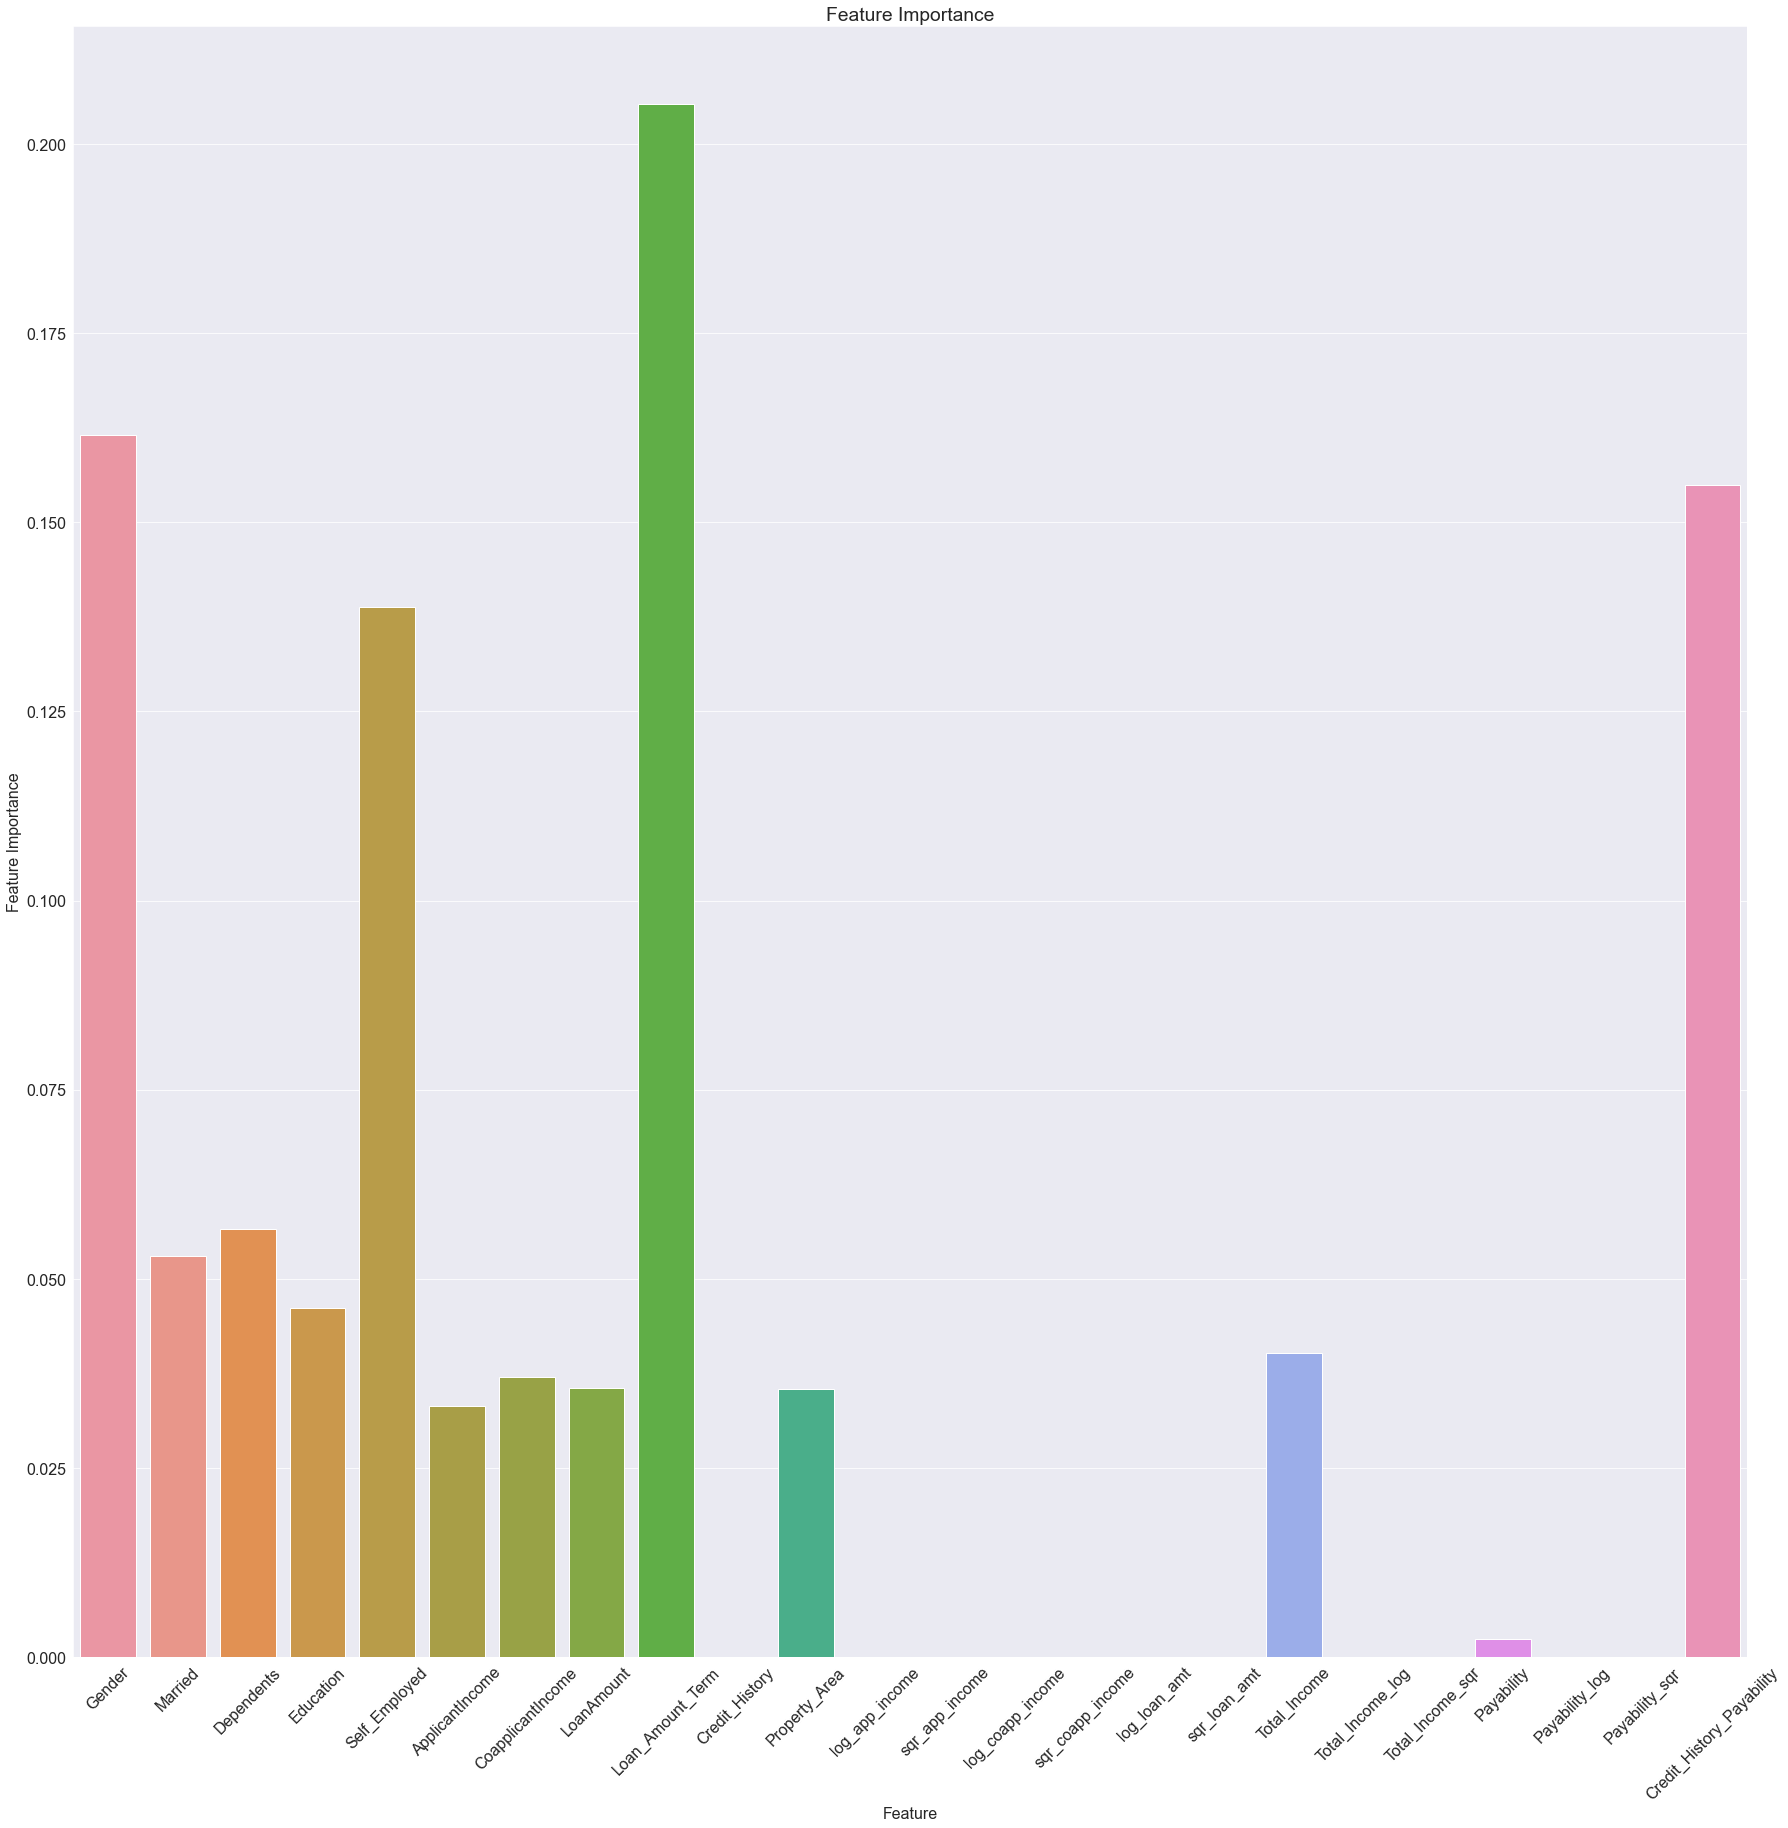

In [61]:
# Instantiating Feature Importance Function
Feature_Importance(xgb, x_train, y_train, x_test, y_test)